# Regresja wielomianowa

In [ ]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy import stats
from patsy import dmatrices

import matplotlib.pyplot as plt

# Zadanie 1
Wygeneruj $n$ par punktów (x, y) takich, że
$$
y = x - 2x^2 + 0.5x^3 + e,
$$
gdzie $e\sim\mathcal{N}(\mu, \sigma)$. 
A następnie dopasuj model

a) regresji liniowej: $y=\beta_0 + \beta_1\cdot x$

b) regresji wielomianowej stopnia 2: $y=\beta_0 + \beta_1\cdot x + \beta_2\cdot x^2$,

c) regresji wielomianowej stopnia 3: $y=\beta_0 + \beta_1\cdot x + \beta_2\cdot x^2 + \beta_3\cdot x^3$,

d) regresji wielomianowej stopnia 20: $y=\beta_0 + \beta_1\cdot x + \beta_2\cdot x^2 + \ldots + \beta_{20}\cdot x^{20}$,

**Wskazówka**: `smf.ols('y ~ x + I(x**k)', data_frame)` lub `PolynomialFeatures` z `sklearn.preprocessing`

In [ ]:
# n = 100
# x = stats.uniform.rvs(size = n,loc = -3, scale = 6)
# eps = stats.norm.rvs(size = n, loc = 2,scale = 2)
# y = x-2*(x**2)+0.5*(x**3)+eps

In [ ]:
# plt.scatter(x,y)

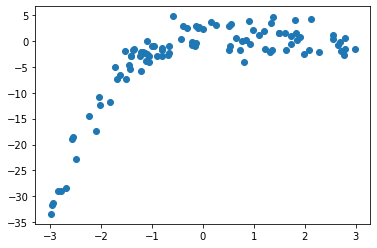

In [ ]:
# X = sm.add_constant(x,prepend = True,has_constant = 'add')
# model1 = sm. OLS(endog=y,exog = X).fit()
# model1.summary()

In [ ]:
# plt.scatter(x,y)
# plt.plot(x,x*model1.params[1]+model1.params[0],color = 'red',label = 'degree=1')

In [ ]:
# from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# pol2 = PolynomialFeatures(degree = 2)
# x2 = pol2.fit_transform(x.reshape(-1,1))
# model2 = sm. OLS(endog=y,exog = x2).fit()
# model2.summary()

In [ ]:
# plt.scatter(x,y)
# import operator
# sort_axis = operator.itemgetter(0)
# sorted_zip = sorted(zip(x, model2.fittedvalues), key=sort_axis)
# x_range, y_poly_pred = zip(*sorted_zip)
# plt.plot(x_range,y_poly_pred,color = 'green',label = 'degree=2')

In [ ]:
# pol3 = PolynomialFeatures(degree = 3)
# x3 = pol3.fit_transform(x.reshape(-1,1))
# model3 = sm. OLS(endog=y,exog = x3).fit()
# model3.summary()

In [ ]:
# plt.scatter(x,y)

# sort_axis = operator.itemgetter(0)
# sorted_zip = sorted(zip(x, model3.fittedvalues), key=sort_axis)
# x_range, y_poly_pred = zip(*sorted_zip)
# plt.plot(x_range,y_poly_pred,color = 'blue',label = 'degree=3')

In [ ]:
# pol20 = PolynomialFeatures(degree = 20)
# x20 = pol20.fit_transform(x.reshape(-1,1))
# model20 = sm. OLS(endog=y,exog = x20).fit()
# model20.summary()

In [ ]:
# plt.scatter(x,y)

# sort_axis = operator.itemgetter(0)
# sorted_zip = sorted(zip(x, model20.fittedvalues), key=sort_axis)
# x_range, y_poly_pred = zip(*sorted_zip)
# plt.plot(x_range,y_poly_pred,color = 'crimson',label = 'degree=20')

In [ ]:
# plt.scatter(x,y)

# plt.scatter(x,y)
# plt.plot(x,x*model1.params[1]+model1.params[0],color = 'red',label = 'degree=1')

# sort_axis = operator.itemgetter(0)
# sorted_zip = sorted(zip(x, model2.fittedvalues), key=sort_axis)
# x_range, y_poly_pred = zip(*sorted_zip)
# plt.plot(x_range,y_poly_pred,color = 'green',label = 'degree=2')


# sort_axis = operator.itemgetter(0)
# sorted_zip = sorted(zip(x, model3.fittedvalues), key=sort_axis)
# x_range, y_poly_pred = zip(*sorted_zip)
# plt.plot(x_range,y_poly_pred,color = 'blue',label = 'degree=3')


# sort_axis = operator.itemgetter(0)
# sorted_zip = sorted(zip(x, model20.fittedvalues), key=sort_axis)
# x_range, y_poly_pred = zip(*sorted_zip)
# plt.plot(x_range,y_poly_pred,color = 'crimson',label = 'degree=20')
# plt.legend()

### The Bias vs Variance trade-off

**Bias** (obciążenie) - odnosi się do błędu wynikającego z uproszczonych założeń modelu dotyczących dopasowania danych. Wysokie obciążenie oznacza, że model nie jest w stanie uchwycić wzorców w danych, co powoduje niedopasowanie/niedouczenie (ang. *under-fitting*).

**Variance** - odnosi się do błędu spowodowanego złożonym modelem próbującym dopasować dane. Duża wariancja oznacza, że model przechodzi przez większość punktów danych i powoduje nadmierne dopasowanie do danych (ang. *over-fitting).

In [ ]:
# fig, ax = plt.subplots(1, 3, figsize=(20, 7))

# ax[0].scatter(x, y)
# ax[0].plot(x, model1.fittedvalues, '--', color='red', label="degree=1")
# ax[0].set_xlabel("Underfit\nHigh bias\nLow Variance")

# sorted_zip = sorted(zip(x, model3.fittedvalues), key=sort_axis)
# x_range, y_poly_pred = zip(*sorted_zip)
# ax[1].scatter(x, y)
# ax[1].plot(x_range, y_poly_pred, '--', color='magenta', label="degree=3")
# ax[1].set_xlabel("Correct Fit\nLow bias\nLow Variance")

# sorted_zip = sorted(zip(x, model20.fittedvalues), key=sort_axis)
# x_range, y_poly_pred = zip(*sorted_zip)
# ax[2].scatter(x, y)
# ax[2].plot(x_range, y_poly_pred, '--', color='orange', label="degree=20")
# ax[2].set_xlabel("Overfit\nLow bias\nHigh Variance")

# Zadanie 2
Wczytaj dane `amazon_salaries.csv` opisujące wysokość rocznych zarobków (`Salary`) w zależności od zajmowanego stanowiska (`Level`). 

Dopasuj model regresji liniowej oraz model regresji wielomianowej, znajdź najlepszy stopień wielomianu.

In [ ]:
# amazon_salary = pd.read_csv("amazon_salaries.csv")

In [ ]:
# x = amazon_salary.Level
# y = amazon_salary.Salary

# plt.scatter(x, y)